In [3]:
from platform import python_version
print(python_version())

3.9.12


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from isoweek import Week

# I also like having all results from a cell up
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.close('all')

In [6]:
# here I list our countries of interest...
countries = ("New Zealand", "United Kingdom", "United States", "Australia",
             "Chile", "Colombia", "Peru", "Taiwan", "Vietnam")
countries

('New Zealand',
 'United Kingdom',
 'United States',
 'Australia',
 'Chile',
 'Colombia',
 'Peru',
 'Taiwan',
 'Vietnam')

In [7]:
# Time to pull the mortality data. "pd.read_csv" pulls comma-separated values, 
# a common type of dataset that's fairly universal. df.head() prints a sample for inspection.
url3 = "https://raw.githubusercontent.com/akarlinsky/world_mortality/main/world_mortality.csv"
mortality = pd.read_csv(url3)
mortality.head()

,iso3c,country_name,year,time,time_unit,deaths
0,ALB,Albania,2015,1,monthly,2490.0
1,ALB,Albania,2015,2,monthly,2139.0
2,ALB,Albania,2015,3,monthly,2051.0
3,ALB,Albania,2015,4,monthly,1906.0
4,ALB,Albania,2015,5,monthly,1709.0


In [8]:
# Let's tidy our data. We first use df.loc[<some condition>] to select only a range of data that meets
# some conditions -- here, that the country is in our list. 
mortality = mortality.loc[mortality["country_name"].isin(countries)]

# Now we rename our columns to be harmonious with our later data-set, then drop the unneeded columns.
mortality["country"] = mortality["country_name"]
mortality = mortality.drop(columns=["country_name"])

mortality["week"] = mortality["time"]
mortality = mortality.drop(columns=["time", "time_unit", "iso3c"])

In [9]:
# And inspect.
mortality.head()
mortality.dtypes
mortality["deaths"].groupby(mortality["country"]).describe()

,year,deaths,country,week
549,2015,2925.0,Australia,1
550,2015,2772.0,Australia,2
551,2015,2770.0,Australia,3
552,2015,2768.0,Australia,4
553,2015,2680.0,Australia,5


year         int64
deaths     float64
country     object
week         int64
dtype: object

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Australia,404.0,3173.069307,297.740624,2668.0,2953.75,3122.5,3353.0,4185.0
Chile,367.0,2263.215259,391.055486,1642.0,1951.00,2210.0,2468.0,3983.0
Colombia,411.0,5005.145985,1237.127268,3945.0,4275.50,4564.0,5132.5,10606.0
New Zealand,420.0,647.140476,69.095844,511.0,599.00,637.0,684.0,967.0
Peru,301.0,3654.270764,1514.399295,2404.1,2913.60,3076.8,3365.9,9010.2
Taiwan,97.0,14829.618557,1621.769401,12122.0,13712.00,14426.0,15580.0,21033.0
United Kingdom,421.0,12122.135392,2162.125889,7893.0,10680.00,11692.0,12876.0,24691.0
United States,418.0,57849.325359,7758.073516,48285.0,51917.00,56729.5,60024.0,87436.0


In [10]:
# Let's get the data into daily format format as well. 
# We'll assume that all our data are recorded on Mondays of that week. 

# A trick for doing this: we don't actually want to add our numeric values 
# for year and week, so we'll convert them to strings (that we can then drop)
# and then add them, which just "mashes" them together. Then we can just tell
# Pandas that we have the format YEARWEEKdayofweek with %Y%W%w. 
mortality["temp1"] = mortality["year"].astype(str)
mortality["temp2"] = mortality["week"].astype(str)
mortality["datestring"] = mortality["temp1"] + mortality["temp2"]
mortality["datestring"] = mortality["datestring"] + "1"
mortality["date"] = pd.to_datetime(mortality["datestring"], format="%Y%W%w")
mortality = mortality.drop(columns=["temp1", "temp2", "datestring"])
mortality.head()

,year,deaths,country,week,date
549,2015,2925.0,Australia,1,2015-01-05
550,2015,2772.0,Australia,2,2015-01-12
551,2015,2770.0,Australia,3,2015-01-19
552,2015,2768.0,Australia,4,2015-01-26
553,2015,2680.0,Australia,5,2015-02-02


In [11]:
# And inspect.
mortality.head()
mortality.dtypes
mortality["deaths"].groupby(mortality["country"]).describe()

,year,deaths,country,week,date
549,2015,2925.0,Australia,1,2015-01-05
550,2015,2772.0,Australia,2,2015-01-12
551,2015,2770.0,Australia,3,2015-01-19
552,2015,2768.0,Australia,4,2015-01-26
553,2015,2680.0,Australia,5,2015-02-02


year                int64
deaths            float64
country            object
week                int64
date       datetime64[ns]
dtype: object

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Australia,404.0,3173.069307,297.740624,2668.0,2953.75,3122.5,3353.0,4185.0
Chile,367.0,2263.215259,391.055486,1642.0,1951.00,2210.0,2468.0,3983.0
Colombia,411.0,5005.145985,1237.127268,3945.0,4275.50,4564.0,5132.5,10606.0
New Zealand,420.0,647.140476,69.095844,511.0,599.00,637.0,684.0,967.0
Peru,301.0,3654.270764,1514.399295,2404.1,2913.60,3076.8,3365.9,9010.2
Taiwan,97.0,14829.618557,1621.769401,12122.0,13712.00,14426.0,15580.0,21033.0
United Kingdom,421.0,12122.135392,2162.125889,7893.0,10680.00,11692.0,12876.0,24691.0
United States,418.0,57849.325359,7758.073516,48285.0,51917.00,56729.5,60024.0,87436.0


In [12]:
# Now we do the same for the Google and Apple mobility data
url0 = "https://raw.githubusercontent.com/ActiveConclusion/COVID19_mobility/master/summary_reports/summary_report_countries.csv"
googapp = pd.read_csv(url0)
googapp = googapp.loc[googapp['country'].isin(countries)]

In [13]:
# Let's declare these to be time-series data, too, and extract a year. 
googapp["date"] = pd.to_datetime(googapp["date"])
googapp["year"] = pd.to_datetime(googapp["date"]).dt.isocalendar().year
googapp["week"] = pd.to_datetime(googapp["date"]).dt.isocalendar().week
googapp.head()
googapp.dtypes

,country,date,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,transit,walking,year,week
5384,Australia,2020-01-13,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,2020,3
5385,Australia,2020-01-14,NaN,NaN,NaN,NaN,NaN,NaN,2.98,1.78,1.31,2020,3
5386,Australia,2020-01-15,NaN,NaN,NaN,NaN,NaN,NaN,4.21,0.64,1.82,2020,3
5387,Australia,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,8.63,-0.42,4.52,2020,3
5388,Australia,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,9.08,-1.66,13.73,2020,3


country                          object
date                     datetime64[ns]
retail and recreation           float64
grocery and pharmacy            float64
parks                           float64
transit stations                float64
workplaces                      float64
residential                     float64
driving                         float64
transit                         float64
walking                         float64
year                             UInt32
week                             UInt32
dtype: object

In [14]:
# And, finally, let's collapse by week. This is probably more rigorous
# than "upcasting" our weekly data. 
googapp = googapp.groupby(["country", "year", "week"]).mean()

In [15]:
# Now we can merge on the unique pairings of country and date
# "how = 'outer'" keeps unmerged rows, which we want since we 
# know that these DFs are of different dimensions
df = pd.merge(googapp, mortality, how="outer", on=["country", "year", "week"])

In [16]:
# Let's now make sure that our data-set is sorted and take a peek with a sorted sample. 
# Note that we have to re-set the index manually in Pandas.
df = df.sort_values(by =["country", "date"])
df = df.reset_index(drop=True)
df.head(5)

# This is good -- we should expect only excess mortality data from those earlier years
# We do want the older data to construct excess mortality estimates
# but we don't need it past the time that mobility data stopped being constructed. 
df = df.loc[df["date"]<"2022-05-01"]

,country,year,week,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,transit,walking,deaths,date
0,Australia,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925.0,2015-01-05
1,Australia,2015,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2772.0,2015-01-12
2,Australia,2015,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2770.0,2015-01-19
3,Australia,2015,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2768.0,2015-01-26
4,Australia,2015,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2680.0,2015-02-02


In [17]:
# We can now do a bit of grouping to print our results in a convenient way 
# and get a sense for what the data look like. The COVID-policy outcomes 
# should exist for only three years; deaths should go back further.
from tabulate import tabulate

# First we make an analytical df aggregated by country-year pairs and take means of all other variables
# This is basically like using Stata's -collapse- for what would be, in Stata, better to do with
# -bysort-. It's much less destructive in Python. 
grouped = df.groupby(["country", "year"]).mean()

# Now we just keep a few columns to make this easy to assess. 
grouped = grouped[["transit stations", "transit", "deaths"]]

# And print in tabular format. 
print(tabulate(grouped, tablefmt="pipe", headers="keys"))

|                          |   transit stations |   transit |    deaths |
|:-------------------------|-------------------:|----------:|----------:|
| ('Australia', 2015)      |          nan       | nan       |  3014.38  |
| ('Australia', 2016)      |          nan       | nan       |  3035.54  |
| ('Australia', 2017)      |          nan       | nan       |  3152.37  |
| ('Australia', 2018)      |          nan       | nan       |  3059.06  |
| ('Australia', 2019)      |          nan       | nan       |  3161     |
| ('Australia', 2020)      |          -38.3556  | -43.7193  |  3107.6   |
| ('Australia', 2021)      |          -43.8819  | -31.9811  |  3287.69  |
| ('Australia', 2022)      |          -43.7731  |  -2.32159 |  3489.18  |
| ('Chile', 2016)          |          nan       | nan       |  1987.98  |
| ('Chile', 2017)          |          nan       | nan       |  2039.33  |
| ('Chile', 2018)          |          nan       | nan       |  2047.27  |
| ('Chile', 2019)          |          

In [18]:
# The next step is to make some weekly excess death figures.
# We first make a df for pre-2020 data so that we have a baseline unaffected by COVID. 
pre20data = df[df["year"]<2020]

gb = pre20data.groupby(["country", "week"])["deaths"]
for i in gb:
    print(i)
# This is quite helpful. https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html
# as is this: # https://stackoverflow.com/questions/45255236/how-is-pandas-groupby-method-actually-working
# groupby basically reframes our df as a Kronecker "merge": df = [groups]'[I_groups] +merge [data matrix]
# it then splits this into a bunch of paired objects: a vector defining unique groups and then a vector
# of all observations per group


(('Australia', 1), 0      2925.0
53     2789.0
105    2895.0
157    2818.0
209    2966.0
Name: deaths, dtype: float64)
(('Australia', 2), 1      2772.0
54     2870.0
106    2897.0
158    2828.0
210    2997.0
Name: deaths, dtype: float64)
(('Australia', 3), 2      2770.0
55     2825.0
107    2806.0
159    2763.0
211    3041.0
Name: deaths, dtype: float64)
(('Australia', 4), 3      2768.0
56     2668.0
108    2887.0
160    2882.0
212    2957.0
Name: deaths, dtype: float64)
(('Australia', 5), 4      2680.0
57     2817.0
109    2745.0
161    2885.0
213    2890.0
Name: deaths, dtype: float64)
(('Australia', 6), 5      2878.0
58     2730.0
110    2911.0
162    2724.0
214    2957.0
Name: deaths, dtype: float64)
(('Australia', 7), 6      2749.0
59     2734.0
111    2849.0
163    2825.0
215    2958.0
Name: deaths, dtype: float64)
(('Australia', 8), 7      2740.0
60     2753.0
112    2958.0
164    2857.0
216    3094.0
Name: deaths, dtype: float64)
(('Australia', 9), 8      2788.0
61     2728.0
1

Name: deaths, dtype: float64)
(('Colombia', 41), 811     4143.0
864     4162.0
916     4351.0
968     4339.0
1020    4540.0
Name: deaths, dtype: float64)
(('Colombia', 42), 812     4022.0
865     4127.0
917     4416.0
969     4306.0
1021    4581.0
Name: deaths, dtype: float64)
(('Colombia', 43), 813     4004.0
866     4049.0
918     4151.0
970     4253.0
1022    4600.0
Name: deaths, dtype: float64)
(('Colombia', 44), 814     4209.0
867     4021.0
919     4273.0
971     4391.0
1023    4732.0
Name: deaths, dtype: float64)
(('Colombia', 45), 815     4138.0
868     4155.0
920     4399.0
972     4317.0
1024    4706.0
Name: deaths, dtype: float64)
(('Colombia', 46), 816     4334.0
869     4111.0
921     4191.0
973     4472.0
1025    4649.0
Name: deaths, dtype: float64)
(('Colombia', 47), 817     4276.0
870     4237.0
922     4251.0
974     4407.0
1026    4738.0
Name: deaths, dtype: float64)
(('Colombia', 48), 818     4260.0
871     4178.0
923     4363.0
975     4595.0
1027    4709.0
Name: de

Name: deaths, dtype: float64)
(('Taiwan', 3), 1905    16092.0
1917    18918.0
1929    17391.0
1941    17200.0
1953    15171.0
Name: deaths, dtype: float64)
(('Taiwan', 4), 1906    14002.0
1918    14520.0
1930    13110.0
1942    13988.0
1954    14996.0
Name: deaths, dtype: float64)
(('Taiwan', 5), 1907    12802.0
1919    14238.0
1931    13914.0
1943    14328.0
1955    14655.0
Name: deaths, dtype: float64)
(('Taiwan', 6), 1908    13712.0
1920    13445.0
1932    14453.0
1944    13043.0
1956    13302.0
Name: deaths, dtype: float64)
(('Taiwan', 7), 1909    14475.0
1921    13021.0
1933    14479.0
1945    14372.0
1957    15854.0
Name: deaths, dtype: float64)
(('Taiwan', 8), 1910    12586.0
1922    14195.0
1934    15580.0
1946    14162.0
1958    13983.0
Name: deaths, dtype: float64)
(('Taiwan', 9), 1911    12527.0
1923    12829.0
1935    13436.0
1947    12886.0
1959    13866.0
Name: deaths, dtype: float64)
(('Taiwan', 10), 1912    13794.0
1924    13676.0
1936    13710.0
1948    14922.0
1960   

In [19]:
df["week_mean_death"] = gb.transform("mean")
# Let's check our work quickly around the time of the transition, noting that we are now missing
# the baseline for weekly mean deaths.
df[df["date"]>"2019-11-30"].head(20)

,country,year,week,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,transit,walking,deaths,date,week_mean_death
256,Australia,2019,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2986.0,2019-12-02,2914.2
257,Australia,2019,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2958.0,2019-12-09,2878.8
258,Australia,2019,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2994.0,2019-12-16,2947.6
259,Australia,2019,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2950.0,2019-12-23,2905.8
260,Australia,2019,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2881.0,2019-12-30,2847.0
261,Australia,2020,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2926.0,2020-01-06,NaN
262,Australia,2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902.0,2020-01-13,NaN
263,Australia,2020,3,NaN,NaN,NaN,NaN,NaN,NaN,1.892857,-1.831429,2.884286,2914.0,2020-01-20,NaN
264,Australia,2020,4,NaN,NaN,NaN,NaN,NaN,NaN,2.401429,0.388571,5.265714,3007.0,2020-01-27,NaN
265,Australia,2020,5,NaN,NaN,NaN,NaN,NaN,NaN,-2.697143,-0.641429,-0.617143,2910.0,2020-02-03,NaN


In [20]:
# The solution here is to forward fill once we've grouped the data by country and week. 
# In Stata, the solution would more likely involve -bysort-, which is a slightly cruder
# solution: we coerce the order of the rows and then just fill down over groups. 

# Here we make a small analytical data-set that I will first show. 
# Note that here we take the mean across weeks. This means that if 
# any week had an observation, there will be a number here. In reality,
# we have MVs in the df for the weeks after 2019 -- what we will do is use this 
# mean to fill forward. 
countryweek = df.groupby(["country", "week"]).mean()
grouped = countryweek[["driving", "transit", "deaths", "week_mean_death"]]
print(tabulate(grouped, tablefmt="pipe", headers="keys"))

|                        |    driving |    transit |    deaths |   week_mean_death |
|:-----------------------|-----------:|-----------:|----------:|------------------:|
| ('Australia', 1)       |   5.57786  | -34.0064   |  2959.25  |           2878.6  |
| ('Australia', 2)       |  13.2714   | -26.4543   |  2994     |           2872.8  |
| ('Australia', 3)       |  12.2052   | -14.6481   |  3019.62  |           2841    |
| ('Australia', 4)       |   9.03429  | -12.3814   |  2986.88  |           2832.4  |
| ('Australia', 5)       |   8.89429  | -11.3986   |  2966.75  |           2803.4  |
| ('Australia', 6)       |  10.931    | -10.6805   |  2955.12  |           2840    |
| ('Australia', 7)       |  14.3852   |  -3.15095  |  2936.12  |           2823    |
| ('Australia', 8)       |  17.3048   |   2.23429  |  2989.12  |           2880.4  |
| ('Australia', 9)       |  17.8367   |   3.53524  |  2978.38  |           2858    |
| ('Australia', 10)      |  15.9253   |   1.86754  |  2976.5   | 

| ('United States', 53)  |   2.70286  | -56.5429   | 87035     |            nan    |


In [21]:
# Now, the idea is that we will forward fill down the missing weeks. 
df["week_mean_death"] = df.groupby(["country", "week"])["week_mean_death"].ffill()

In [22]:
# As usual, let's check our work.
# Random sampling of groups is a little hard in Python unless the groups are all of the same size: 
# see discussion: https://stackoverflow.com/questions/22472213/python-random-selection-per-group

# But, we should probably know why we don't have equal sizes anyways!
# Here's some nice code: https://stackoverflow.com/questions/17995024/how-to-assign-a-name-to-the-size-column
quick = df[["country", "week", "deaths"]]
df["groupsize"] = quick.groupby(["country", "week"]).transform(np.size)
df.loc[df["groupsize"]<5]

,country,year,week,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,transit,walking,deaths,date,week_mean_death,groupsize
52,Australia,2015,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2819.0,2016-01-04,2819.0,2
313,Australia,2020,53,-10.714286,1.857143,9.285714,-50.714286,-47.857143,11.571429,-4.415714,-41.468571,-12.902857,2987.0,2021-01-04,2819.0,2
664,Chile,2020,53,-42.857143,-15.857143,-43.285714,-35.571429,-29.857143,15.714286,-20.561429,NaN,-35.032857,2239.0,2021-01-04,NaN,1
823,Colombia,2015,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4580.0,2016-01-04,4580.0,2
1084,Colombia,2020,53,-37.857143,-3.142857,-20.000000,-32.285714,-33.000000,12.000000,-5.588571,NaN,25.140000,7881.0,2021-01-04,4580.0,2
1234,New Zealand,2015,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575.0,2016-01-04,575.0,2
1495,New Zealand,2020,53,-0.714286,1.571429,33.285714,-46.571429,-53.285714,10.285714,14.937143,-45.574286,-3.211429,675.0,2021-01-04,575.0,2
1810,Peru,2020,53,-37.000000,-14.714286,-29.571429,-41.428571,-32.857143,16.571429,NaN,NaN,NaN,3840.1,2021-01-04,NaN,1
2154,United Kingdom,2015,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8773.0,2016-01-04,8773.0,2
2415,United Kingdom,2020,53,-58.285714,-21.142857,5.285714,-67.714286,-61.571429,22.285714,-41.195714,-63.688571,-41.468571,11580.0,2021-01-04,8773.0,2


In [23]:
# Let's check for missing values while we're at it. 
df.isnull().sum()
df[df["week_mean_death"].isna()]

# So, we're running into the "53 weeks" problem. I think it's fine to just drop these three observations for
# simple exploratory analysis. 
df = df.loc[df["week"]<53]
df.isnull().sum()

# Let's finally check and see if that fixed things
groups = ["country", "week"]
print(f"The minimum number of country week pairings observered is {min(df.groupby(groups).size())}")

# Five seems much more reasonable

country                     0
year                        0
week                        0
retail and recreation    1776
grocery and pharmacy     1776
parks                    1776
transit stations         1776
workplaces               1776
residential              1776
driving                  1876
transit                  2112
walking                  1876
deaths                      0
date                        0
week_mean_death             3
groupsize                   0
dtype: int64

,country,year,week,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,transit,walking,deaths,date,week_mean_death,groupsize
664,Chile,2020,53,-42.857143,-15.857143,-43.285714,-35.571429,-29.857143,15.714286,-20.561429,NaN,-35.032857,2239.0,2021-01-04,NaN,1
1810,Peru,2020,53,-37.000000,-14.714286,-29.571429,-41.428571,-32.857143,16.571429,NaN,NaN,NaN,3840.1,2021-01-04,NaN,1
2835,United States,2020,53,-22.285714,-8.857143,-14.571429,-40.857143,-42.571429,14.285714,2.702857,-56.542857,1.152857,87035.0,2021-01-04,NaN,1


country                     0
year                        0
week                        0
retail and recreation    1772
grocery and pharmacy     1772
parks                    1772
transit stations         1772
workplaces               1772
residential              1772
driving                  1871
transit                  2105
walking                  1871
deaths                      0
date                        0
week_mean_death             0
groupsize                   0
dtype: int64

The minimum number of country week pairings observered is 5


In [25]:
# Now let's browse some samples -- this is important when you don't have a true
# spreadsheet of data. First, we make a groupby object...
gb = df.groupby(["country", "week"])

# Then we put the number of groups into a vector a
a=np.arange(gb.ngroups)

# Randomly shuffle its contents
np.random.shuffle(a)

# Then take a sample of five complete groups
sampleofgroups = df[gb.ngroup().isin(a[:5])]

# Omitting some variables for clarity
sampleofgroups = sampleofgroups[["country", "week", "year", "transit stations",\
                                 "transit", "deaths", "week_mean_death"]]

# And sorting the values to make the output readable
sampleofgroups.sort_values(by =["country", "week", "year"])

,country,week,year,transit stations,transit,deaths,week_mean_death
410,Chile,7,2016,NaN,NaN,1760.0,1833.25
462,Chile,7,2017,NaN,NaN,1813.0,1833.25
514,Chile,7,2018,NaN,NaN,1885.0,1833.25
566,Chile,7,2019,NaN,NaN,1875.0,1833.25
618,Chile,7,2020,2.000000,NaN,1909.0,1833.25
671,Chile,7,2021,-28.285714,NaN,2502.0,1833.25
723,Chile,7,2022,0.285714,NaN,3242.0,1833.25
1214,New Zealand,33,2015,NaN,NaN,723.0,716.80
1267,New Zealand,33,2016,NaN,NaN,710.0,716.80
1319,New Zealand,33,2017,NaN,NaN,739.0,716.80


In [26]:
# Finally, let's make a moving average of excess death.

# We first simply make a vector of deviations, which might be useful to inspect by hand
df["death_dev"] = df["deaths"] - df["week_mean_death"]

# Then we take this deviation as a percent of the mean for that week, historically
df["excess_mortality"] = (df["death_dev"]*100)/df["week_mean_death"]

# Then we turn it into a moving average
df["MA_EM"] = df["excess_mortality"].rolling(3, min_periods=2).mean()
df.dtypes

country                          object
year                             UInt32
week                             UInt32
retail and recreation           float64
grocery and pharmacy            float64
parks                           float64
transit stations                float64
workplaces                      float64
residential                     float64
driving                         float64
transit                         float64
walking                         float64
deaths                          float64
date                     datetime64[ns]
week_mean_death                 float64
groupsize                         int64
death_dev                       float64
excess_mortality                float64
MA_EM                           float64
dtype: object

In [33]:
# Let's now make some cool graphs. The first step is to melt our df after 
# using only those countries with observations on these data
countries1 = "Australia", "United States", "Chile", "Colombia", "United Kingdom", "New Zealand"
cutoff ='2022-04-01 00:00:00'
df_mod1 = df[(df["year"]>2019) & (df["date"]<cutoff) & df["country"].isin(countries1)]
df_mod1 = df_mod1[["date", "country", "driving", "transit", "walking", "excess_mortality"]]
df_mod1[["driving", "transit", "walking", "excess_mortality"]] = df_mod1.rolling(7)["driving", "transit", "walking", "excess_mortality"].mean().fillna(method='bfill').fillna(method='ffill')
df_mod1.dtypes
df_melt1 = pd.melt(df_mod1, ["country", 'date'])
df_melt1.head(20)

date                datetime64[ns]
country                     object
driving                    float64
transit                    float64
walking                    float64
excess_mortality           float64
dtype: object

,country,date,variable,value
0,Australia,2020-01-06,driving,2.487143
1,Australia,2020-01-13,driving,2.487143
2,Australia,2020-01-20,driving,2.487143
3,Australia,2020-01-27,driving,2.487143
4,Australia,2020-02-03,driving,2.487143
5,Australia,2020-02-10,driving,2.487143
6,Australia,2020-02-17,driving,2.487143
7,Australia,2020-02-24,driving,2.487143
8,Australia,2020-03-02,driving,2.487143
9,Australia,2020-03-09,driving,2.598163


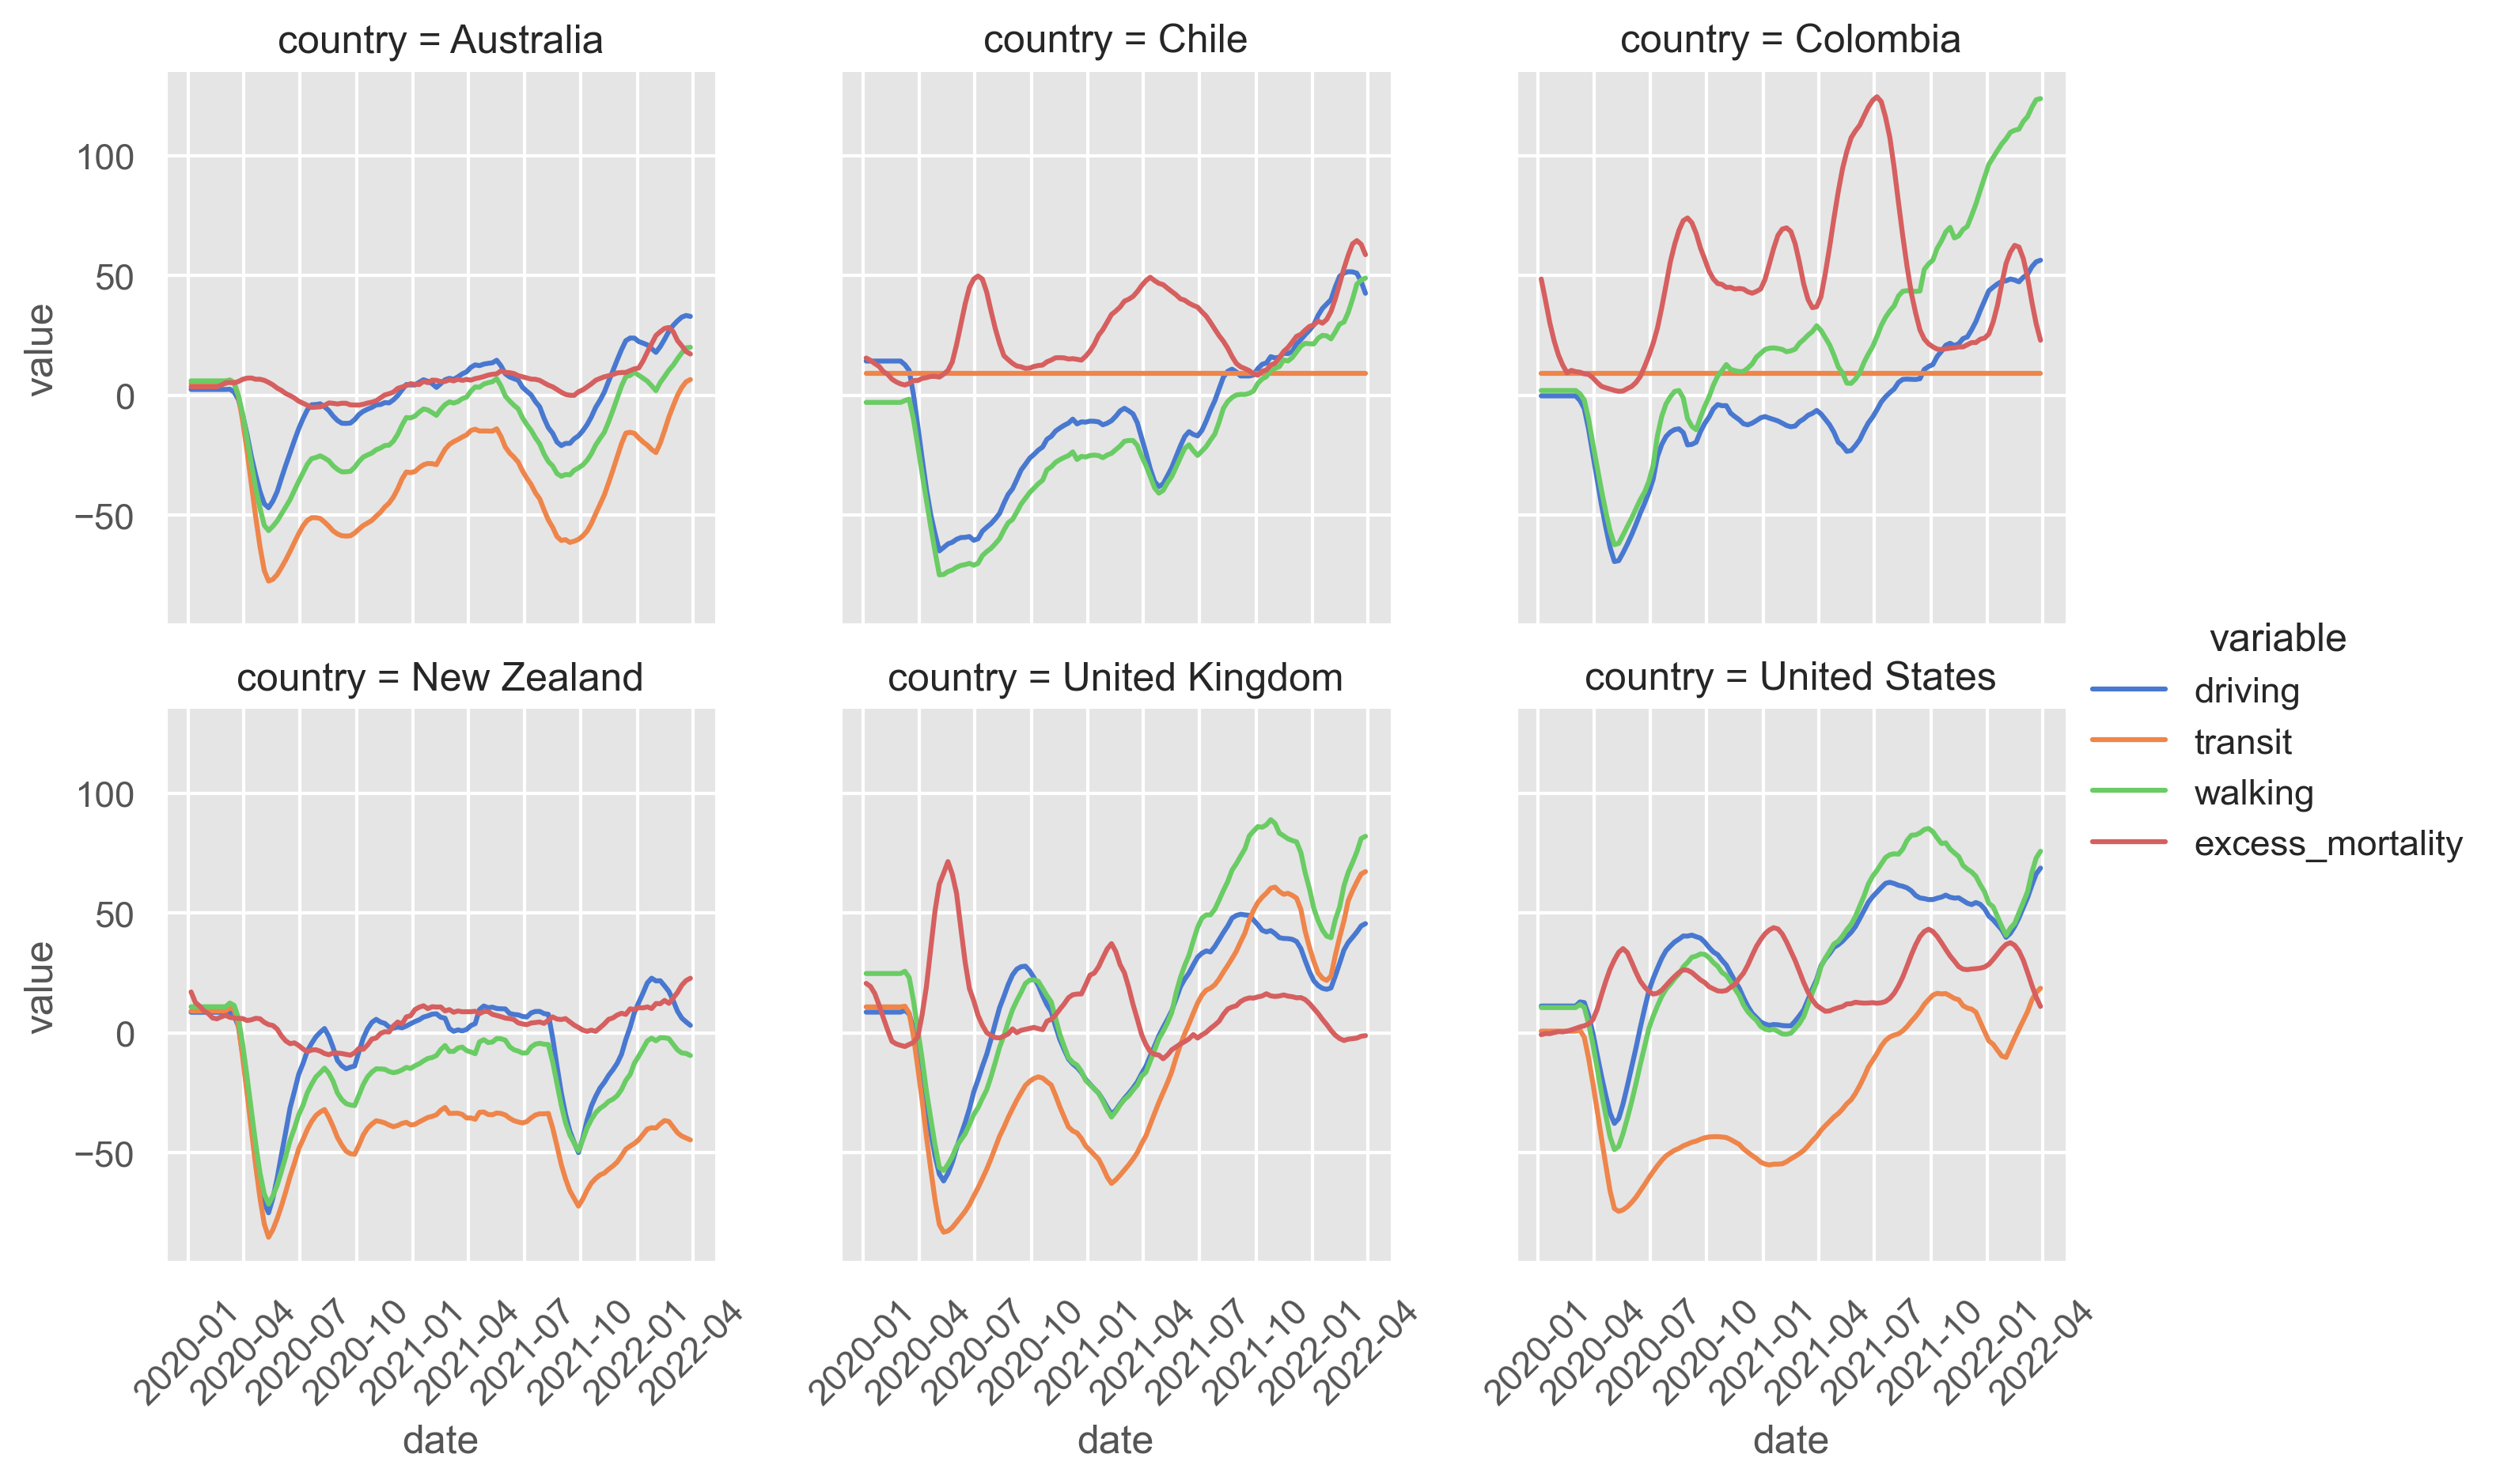

In [34]:
sns.set_theme(style="darkgrid")
plt.style.use('ggplot')
g1 = sns.FacetGrid(df_melt1, col='country', hue='variable', col_wrap=3,  palette="muted")
g1 = g1.map(sns.lineplot, 'date', 'value')
g1.add_legend()
g1.set_xticklabels(rotation=45)

In [ ]:
# cell in progress 
vars2 = "excess_mortality", "retail and recreation", "grocery and pharmacy", "parks", "transit stations", "workplaces", "residential"
df_mod2 = df[df["year"]>2019]
df_mod2 = df_mod2[["country", "date", "excess_mortality", "retail and recreation", "grocery and pharmacy", "parks", "transit stations", "workplaces", "residential" ]]
df_mod2[["excess_mortality", "retail and recreation", "grocery and pharmacy", "parks", "transit stations", "workplaces", "residential"]] = df_mod2.rolling(14)[vars2].mean().fillna(method='bfill').fillna(method='ffill')
df_melt2 = pd.melt(df_mod2, ["country", 'date'])
df_melt2.head(20)